In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import shutil
import os

# Replace with your actual dataset path
original_path = "/kaggle/input/ecg-analysis/ECG_DATA"
writable_path = "/kaggle/working/ECG_DATA"

# Copy the dataset to a writable directory
shutil.copytree(original_path, writable_path)
print("✅ Dataset copied to working directory.")

✅ Dataset copied to working directory.


In [2]:
from pathlib import Path
import random

base_dir = Path('/kaggle/working/ECG_DATA')
train_dir = base_dir / 'train'
val_dir = base_dir / 'val'

os.makedirs(val_dir, exist_ok=True)
class_names = os.listdir(train_dir)

for class_name in class_names:
    os.makedirs(val_dir / class_name, exist_ok=True)

split_ratio = 0.15

for class_name in class_names:
    class_path = train_dir / class_name
    images = os.listdir(class_path)
    random.shuffle(images)

    split_count = int(len(images) * split_ratio)
    val_images = images[:split_count]

    for img in val_images:
        src_path = class_path / img
        dst_path = val_dir / class_name / img
        shutil.move(src_path, dst_path)

print("✅ Validation set created successfully in writable directory.")

✅ Validation set created successfully in writable directory.


In [3]:
from pathlib import Path

def count_images_per_class(root_dir):
    root = Path(root_dir)
    print(f"📁 Folder: {root.name}")
    for class_dir in sorted(root.iterdir()):
        if class_dir.is_dir():
            count = len(list(class_dir.glob('*')))
            print(f"  - {class_dir.name}: {count} images")

# Count images in train, val, and test
count_images_per_class("/kaggle/working/ECG_DATA/train")
count_images_per_class("/kaggle/working/ECG_DATA/val")
count_images_per_class("/kaggle/working/ECG_DATA/test")

📁 Folder: train
  - ECG Images of Myocardial Infarction Patients (240x12=2880): 813 images
  - ECG Images of Patient that have History of MI (172x12=2064): 439 images
  - ECG Images of Patient that have abnormal heartbeat (233x12=2796): 595 images
  - Normal Person ECG Images (284x12=3408): 725 images
📁 Folder: val
  - ECG Images of Myocardial Infarction Patients (240x12=2880): 143 images
  - ECG Images of Patient that have History of MI (172x12=2064): 77 images
  - ECG Images of Patient that have abnormal heartbeat (233x12=2796): 104 images
  - Normal Person ECG Images (284x12=3408): 127 images
📁 Folder: test
  - ECG Images of Myocardial Infarction Patients (240x12=2880): 239 images
  - ECG Images of Patient that have History of MI (172x12=2064): 172 images
  - ECG Images of Patient that have abnormal heartbeat (233x12=2796): 233 images
  - Normal Person ECG Images (284x12=3408): 284 images


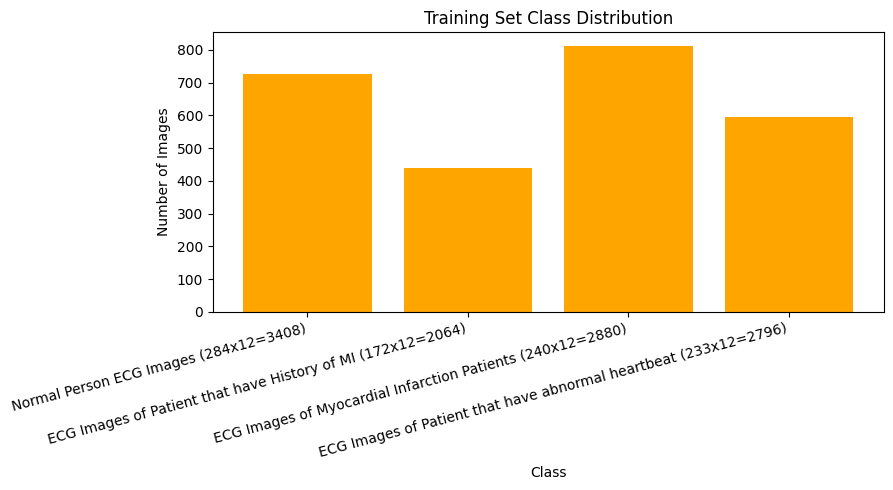

In [4]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Set your train folder path
train_path = Path("/kaggle/working/ECG_DATA/train")

# Count images in each class
class_counts = {cls.name: len(list(cls.glob("*"))) for cls in train_path.iterdir() if cls.is_dir()}

# Plot
plt.figure(figsize=(9, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='orange')
plt.title("Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

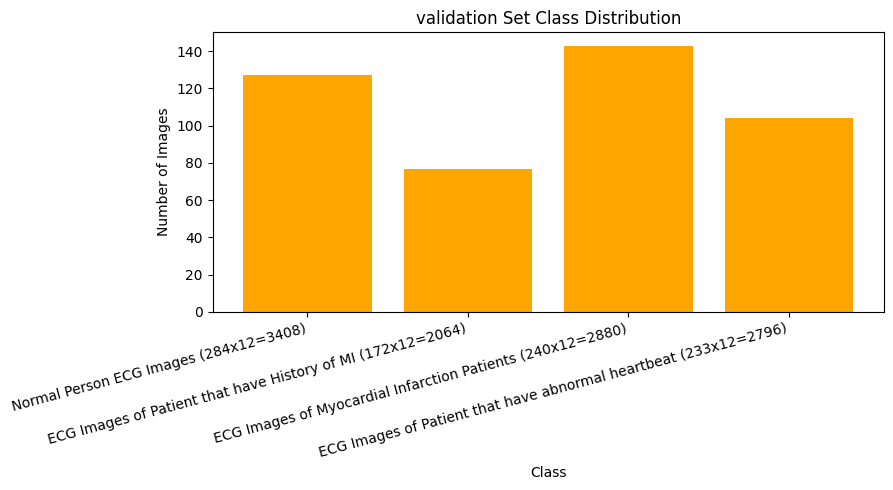

In [5]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Set your train folder path
train_path = Path("/kaggle/working/ECG_DATA/val")

# Count images in each class
class_counts = {cls.name: len(list(cls.glob("*"))) for cls in train_path.iterdir() if cls.is_dir()}

# Plot
plt.figure(figsize=(9, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='orange')
plt.title("validation Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

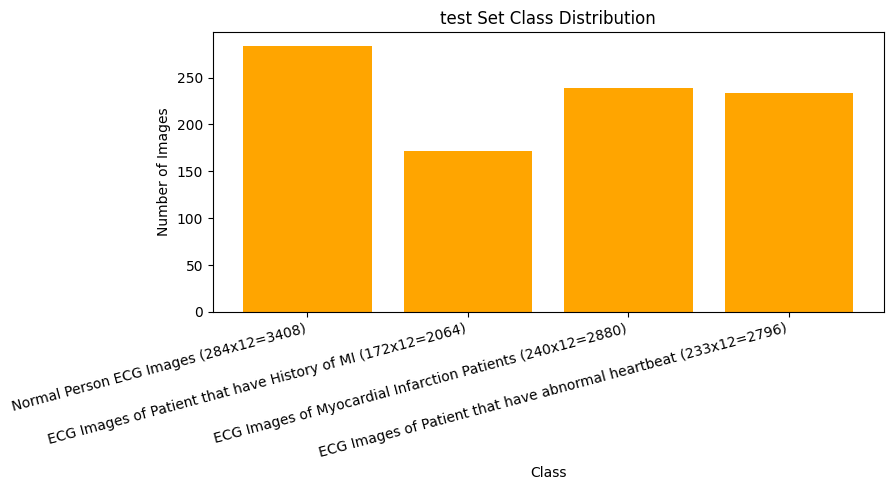

In [7]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Set your train folder path
train_path = Path("/kaggle/working/ECG_DATA/test")

# Count images in each class
class_counts = {cls.name: len(list(cls.glob("*"))) for cls in train_path.iterdir() if cls.is_dir()}

# Plot
plt.figure(figsize=(9, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='orange')
plt.title("test Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

In [4]:
from torchvision import transforms

# ✅ Augmentation pipeline for training set
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),               # simulate zoom
    #transforms.RandomHorizontalFlip(),               # horizontal shift
    transforms.RandomRotation(10),                   # slight tilt
    transforms.ColorJitter(brightness=0.1, contrast=0.1),  # optional: ECG brightness/contrast
    transforms.ToTensor(),                           # convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406],       # ImageNet mean
                         [0.229, 0.224, 0.225])       # ImageNet std
])

# ✅ Simpler transform for validation and test sets (no augmentation)
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [5]:
from torchvision import datasets

train_dataset = datasets.ImageFolder('/kaggle/working/ECG_DATA/train', transform=train_transforms)
val_dataset = datasets.ImageFolder('/kaggle/working/ECG_DATA/val', transform=val_test_transforms)
test_dataset = datasets.ImageFolder('/kaggle/working/ECG_DATA/test', transform=val_test_transforms)

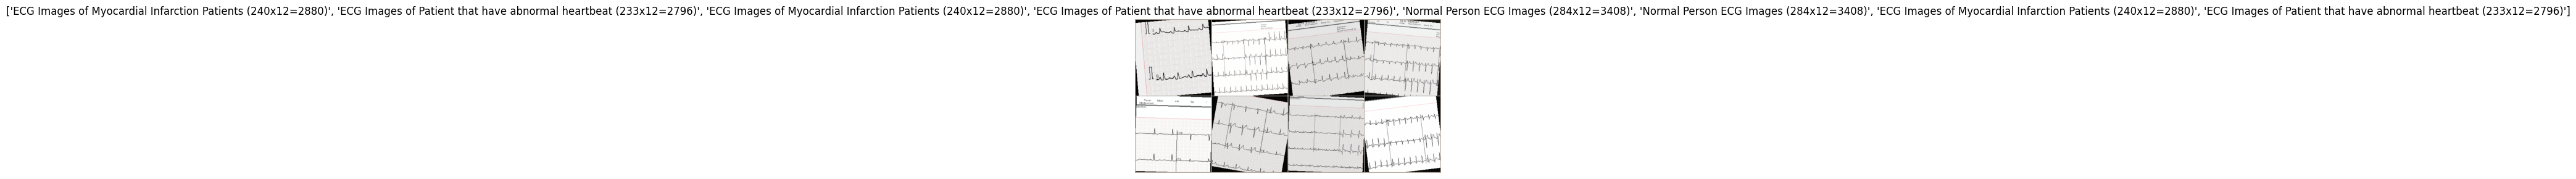

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

# Helper function to reverse normalization for display
def imshow(img_tensor, title=None):
    img = img_tensor.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title: plt.title(title)
    plt.axis('off')
    plt.show()

# Load one batch with augmentation applied
from torch.utils.data import DataLoader

train_loader_vis = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Get a single batch
images, labels = next(iter(train_loader_vis))
class_names = train_dataset.classes

# Show the grid of images
grid = make_grid(images, nrow=4, pad_value=1)
imshow(grid, title=[class_names[l] for l in labels])

In [7]:
# DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Class names
class_names = train_dataset.classes
print(f"Classes: {class_names}")

Classes: ['ECG Images of Myocardial Infarction Patients (240x12=2880)', 'ECG Images of Patient that have History of MI (172x12=2064)', 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)', 'Normal Person ECG Images (284x12=3408)']


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.cuda.amp import GradScaler, autocast

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load EfficientNet model
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 4)  # 4 classes

# Move model to device
model = model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


Using device: cuda


100%|██████████| 20.5M/20.5M [00:00<00:00, 133MB/s]


In [10]:
# Initialize EfficientNet-B0 (no pretraining)
model = models.efficientnet_b0(weights=None)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(class_names))
model = model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Scheduler: Cosine Annealing with Warm Restarts
scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

# Mixed Precision (for faster training and less memory consumption)
scaler = GradScaler()


/tmp/ipykernel_35/2957621035.py:14: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


In [11]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50):
    history = {
        'train_loss': [], 
        'train_acc': [], 
        'val_loss': [], 
        'val_acc': []
    }
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f"\n🔄 Epoch {epoch + 1}/{num_epochs}")

        # Training Phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels in tqdm(train_loader):
            images, labels = images.to(device), labels.to(device)

            # Mixed Precision Training
            with autocast():
                outputs = model(images)
                loss = criterion(outputs, labels)

            optimizer.zero_grad()
            scaler.scale(loss).backward()
            
            # Gradient Clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=2.0)
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item()

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct_train / total_train
        history['train_loss'].append(epoch_loss)
        history['train_acc'].append(epoch_acc)

        # Scheduler step
        scheduler.step()

        # Validation Phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_acc = correct_val / total_val
        history['val_loss'].append(val_loss / len(val_loader))
        history['val_acc'].append(val_acc)

        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_model_eff_scratch.pth')
            print(f"🔥 Best Model Saved with Accuracy: {best_acc:.4f}")

        print(f"📌 Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f} | Val Loss: {val_loss / len(val_loader):.4f}, Val Acc: {val_acc:.4f}")

    return history


In [12]:
start_time = time.time()
history = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=50)
end_time = time.time()
print(f"\n🕒 Training Time: {(end_time - start_time) / 60:.2f} minutes")



🔄 Epoch 1/50


  0%|          | 0/81 [00:00<?, ?it/s]/tmp/ipykernel_35/1294201711.py:23: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
100%|██████████| 81/81 [01:32<00:00,  1.14s/it]


🔥 Best Model Saved with Accuracy: 0.3947
📌 Train Loss: 1.4125, Train Acc: 0.3383 | Val Loss: 1.2527, Val Acc: 0.3947

🔄 Epoch 2/50


100%|██████████| 81/81 [01:25<00:00,  1.06s/it]


🔥 Best Model Saved with Accuracy: 0.4013
📌 Train Loss: 1.2938, Train Acc: 0.3795 | Val Loss: 1.2591, Val Acc: 0.4013

🔄 Epoch 3/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


🔥 Best Model Saved with Accuracy: 0.4058
📌 Train Loss: 1.2268, Train Acc: 0.4226 | Val Loss: 1.2017, Val Acc: 0.4058

🔄 Epoch 4/50


100%|██████████| 81/81 [01:27<00:00,  1.08s/it]


📌 Train Loss: 1.1524, Train Acc: 0.4456 | Val Loss: 1.4197, Val Acc: 0.3259

🔄 Epoch 5/50


100%|██████████| 81/81 [01:26<00:00,  1.06s/it]


🔥 Best Model Saved with Accuracy: 0.4191
📌 Train Loss: 1.1171, Train Acc: 0.4611 | Val Loss: 1.1060, Val Acc: 0.4191

🔄 Epoch 6/50


100%|██████████| 81/81 [01:25<00:00,  1.06s/it]


🔥 Best Model Saved with Accuracy: 0.5898
📌 Train Loss: 1.0661, Train Acc: 0.4988 | Val Loss: 0.9974, Val Acc: 0.5898

🔄 Epoch 7/50


100%|██████████| 81/81 [01:25<00:00,  1.06s/it]


🔥 Best Model Saved with Accuracy: 0.6075
📌 Train Loss: 1.0361, Train Acc: 0.5214 | Val Loss: 1.0394, Val Acc: 0.6075

🔄 Epoch 8/50


100%|██████████| 81/81 [01:25<00:00,  1.06s/it]


🔥 Best Model Saved with Accuracy: 0.7051
📌 Train Loss: 0.9779, Train Acc: 0.5642 | Val Loss: 0.9431, Val Acc: 0.7051

🔄 Epoch 9/50


100%|██████████| 81/81 [01:25<00:00,  1.06s/it]


📌 Train Loss: 0.8997, Train Acc: 0.6081 | Val Loss: 0.8258, Val Acc: 0.6718

🔄 Epoch 10/50


100%|██████████| 81/81 [01:26<00:00,  1.06s/it]


🔥 Best Model Saved with Accuracy: 0.7095
📌 Train Loss: 0.8606, Train Acc: 0.6217 | Val Loss: 0.8067, Val Acc: 0.7095

🔄 Epoch 11/50


100%|██████████| 81/81 [01:27<00:00,  1.08s/it]


🔥 Best Model Saved with Accuracy: 0.7295
📌 Train Loss: 0.8601, Train Acc: 0.6201 | Val Loss: 0.7972, Val Acc: 0.7295

🔄 Epoch 12/50


100%|██████████| 81/81 [01:27<00:00,  1.08s/it]


🔥 Best Model Saved with Accuracy: 0.7694
📌 Train Loss: 0.8157, Train Acc: 0.6590 | Val Loss: 0.7579, Val Acc: 0.7694

🔄 Epoch 13/50


100%|██████████| 81/81 [01:27<00:00,  1.08s/it]


📌 Train Loss: 0.8103, Train Acc: 0.6656 | Val Loss: 0.6643, Val Acc: 0.7605

🔄 Epoch 14/50


100%|██████████| 81/81 [01:27<00:00,  1.07s/it]


📌 Train Loss: 0.7615, Train Acc: 0.6979 | Val Loss: 0.7190, Val Acc: 0.6918

🔄 Epoch 15/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


🔥 Best Model Saved with Accuracy: 0.8137
📌 Train Loss: 0.7243, Train Acc: 0.7154 | Val Loss: 0.5285, Val Acc: 0.8137

🔄 Epoch 16/50


100%|██████████| 81/81 [01:27<00:00,  1.07s/it]


🔥 Best Model Saved with Accuracy: 0.8492
📌 Train Loss: 0.6618, Train Acc: 0.7341 | Val Loss: 0.5059, Val Acc: 0.8492

🔄 Epoch 17/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.6706, Train Acc: 0.7446 | Val Loss: 1.0428, Val Acc: 0.6341

🔄 Epoch 18/50


100%|██████████| 81/81 [01:25<00:00,  1.06s/it]


📌 Train Loss: 0.6200, Train Acc: 0.7605 | Val Loss: 1.2792, Val Acc: 0.6297

🔄 Epoch 19/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.5809, Train Acc: 0.7959 | Val Loss: 0.7749, Val Acc: 0.7428

🔄 Epoch 20/50


100%|██████████| 81/81 [01:27<00:00,  1.08s/it]


📌 Train Loss: 0.5464, Train Acc: 0.7943 | Val Loss: 0.6100, Val Acc: 0.7960

🔄 Epoch 21/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.4936, Train Acc: 0.8180 | Val Loss: 0.7050, Val Acc: 0.7517

🔄 Epoch 22/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.4943, Train Acc: 0.8079 | Val Loss: 0.5030, Val Acc: 0.8027

🔄 Epoch 23/50


100%|██████████| 81/81 [01:25<00:00,  1.06s/it]


🔥 Best Model Saved with Accuracy: 0.9002
📌 Train Loss: 0.4673, Train Acc: 0.8320 | Val Loss: 0.2993, Val Acc: 0.9002

🔄 Epoch 24/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.4241, Train Acc: 0.8328 | Val Loss: 0.2981, Val Acc: 0.8758

🔄 Epoch 25/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.4134, Train Acc: 0.8511 | Val Loss: 0.2998, Val Acc: 0.8958

🔄 Epoch 26/50


100%|██████████| 81/81 [01:24<00:00,  1.04s/it]


📌 Train Loss: 0.3660, Train Acc: 0.8620 | Val Loss: 0.2913, Val Acc: 0.8736

🔄 Epoch 27/50


100%|██████████| 81/81 [01:24<00:00,  1.04s/it]


🔥 Best Model Saved with Accuracy: 0.9401
📌 Train Loss: 0.3087, Train Acc: 0.8837 | Val Loss: 0.1728, Val Acc: 0.9401

🔄 Epoch 28/50


100%|██████████| 81/81 [01:25<00:00,  1.05s/it]


🔥 Best Model Saved with Accuracy: 0.9424
📌 Train Loss: 0.3062, Train Acc: 0.8845 | Val Loss: 0.1619, Val Acc: 0.9424

🔄 Epoch 29/50


100%|██████████| 81/81 [01:24<00:00,  1.04s/it]


📌 Train Loss: 0.2671, Train Acc: 0.9001 | Val Loss: 0.1572, Val Acc: 0.9401

🔄 Epoch 30/50


100%|██████████| 81/81 [01:23<00:00,  1.03s/it]


📌 Train Loss: 0.2821, Train Acc: 0.8942 | Val Loss: 0.1487, Val Acc: 0.9313

🔄 Epoch 31/50


100%|██████████| 81/81 [01:24<00:00,  1.04s/it]


📌 Train Loss: 0.2546, Train Acc: 0.9106 | Val Loss: 0.1541, Val Acc: 0.9202

🔄 Epoch 32/50


100%|██████████| 81/81 [01:24<00:00,  1.05s/it]


📌 Train Loss: 0.2760, Train Acc: 0.8974 | Val Loss: 0.1649, Val Acc: 0.9113

🔄 Epoch 33/50


100%|██████████| 81/81 [01:24<00:00,  1.05s/it]


🔥 Best Model Saved with Accuracy: 0.9534
📌 Train Loss: 0.2665, Train Acc: 0.8997 | Val Loss: 0.1380, Val Acc: 0.9534

🔄 Epoch 34/50


100%|██████████| 81/81 [01:24<00:00,  1.04s/it]


📌 Train Loss: 0.2583, Train Acc: 0.9044 | Val Loss: 0.1764, Val Acc: 0.9224

🔄 Epoch 35/50


100%|██████████| 81/81 [01:24<00:00,  1.04s/it]


📌 Train Loss: 0.2687, Train Acc: 0.9005 | Val Loss: 0.1755, Val Acc: 0.9379

🔄 Epoch 36/50


100%|██████████| 81/81 [01:25<00:00,  1.05s/it]


📌 Train Loss: 0.3225, Train Acc: 0.8880 | Val Loss: 0.2416, Val Acc: 0.9357

🔄 Epoch 37/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.2787, Train Acc: 0.8958 | Val Loss: 0.1916, Val Acc: 0.9224

🔄 Epoch 38/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.3147, Train Acc: 0.8884 | Val Loss: 0.9412, Val Acc: 0.8226

🔄 Epoch 39/50


100%|██████████| 81/81 [01:27<00:00,  1.08s/it]


📌 Train Loss: 0.3180, Train Acc: 0.8802 | Val Loss: 0.4131, Val Acc: 0.8914

🔄 Epoch 40/50


100%|██████████| 81/81 [01:25<00:00,  1.06s/it]


📌 Train Loss: 0.3569, Train Acc: 0.8659 | Val Loss: 0.2293, Val Acc: 0.9202

🔄 Epoch 41/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.3119, Train Acc: 0.8869 | Val Loss: 0.3627, Val Acc: 0.8670

🔄 Epoch 42/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.3061, Train Acc: 0.8907 | Val Loss: 0.3947, Val Acc: 0.8603

🔄 Epoch 43/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


📌 Train Loss: 0.3285, Train Acc: 0.8834 | Val Loss: 0.2342, Val Acc: 0.9313

🔄 Epoch 44/50


100%|██████████| 81/81 [01:26<00:00,  1.06s/it]


📌 Train Loss: 0.2963, Train Acc: 0.8954 | Val Loss: 0.2578, Val Acc: 0.9002

🔄 Epoch 45/50


100%|██████████| 81/81 [01:24<00:00,  1.04s/it]


📌 Train Loss: 0.2577, Train Acc: 0.9036 | Val Loss: 0.1961, Val Acc: 0.9202

🔄 Epoch 46/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


🔥 Best Model Saved with Accuracy: 0.9645
📌 Train Loss: 0.2433, Train Acc: 0.9125 | Val Loss: 0.1382, Val Acc: 0.9645

🔄 Epoch 47/50


100%|██████████| 81/81 [01:27<00:00,  1.08s/it]


🔥 Best Model Saved with Accuracy: 0.9712
📌 Train Loss: 0.2331, Train Acc: 0.9129 | Val Loss: 0.0878, Val Acc: 0.9712

🔄 Epoch 48/50


100%|██████████| 81/81 [01:25<00:00,  1.06s/it]


📌 Train Loss: 0.2167, Train Acc: 0.9180 | Val Loss: 0.1298, Val Acc: 0.9579

🔄 Epoch 49/50


100%|██████████| 81/81 [01:27<00:00,  1.08s/it]


📌 Train Loss: 0.1935, Train Acc: 0.9281 | Val Loss: 0.0782, Val Acc: 0.9690

🔄 Epoch 50/50


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]


🔥 Best Model Saved with Accuracy: 0.9756
📌 Train Loss: 0.1768, Train Acc: 0.9320 | Val Loss: 0.0898, Val Acc: 0.9756

🕒 Training Time: 85.31 minutes


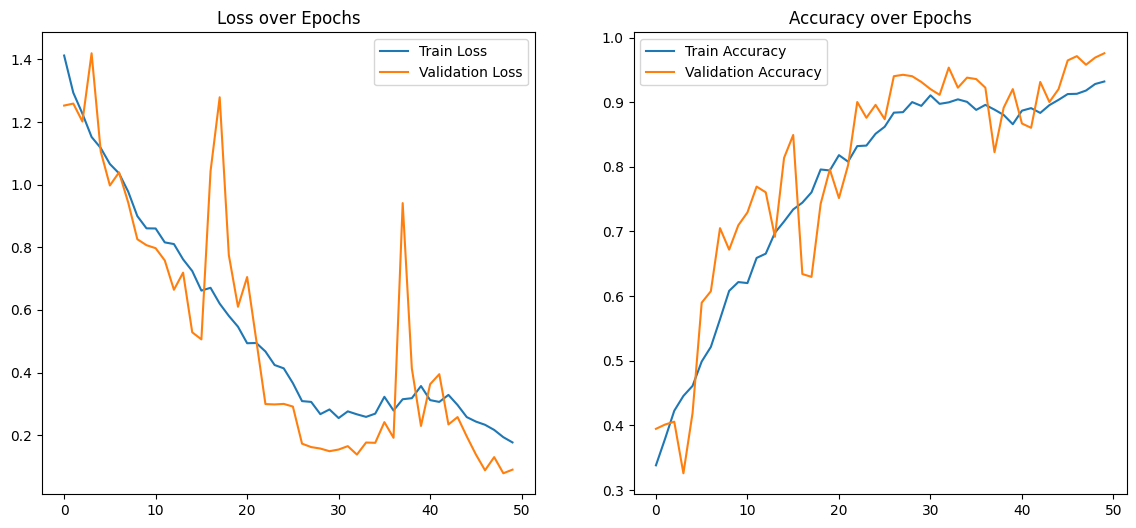

In [13]:
# Plot Loss and Accuracy
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()




=== Test Set Performance ===


Evaluating: 100%|██████████| 29/29 [00:33<00:00,  1.16s/it]



Classification Report:
                       precision    recall  f1-score   support

Myocardial Infarction     0.9917    1.0000    0.9958       239
        History of MI     0.9939    0.9419    0.9672       172
   Abnormal Heartbeat     0.9426    0.9871    0.9644       233
               Normal     0.9929    0.9789    0.9858       284

             accuracy                         0.9795       928
            macro avg     0.9803    0.9770    0.9783       928
         weighted avg     0.9801    0.9795    0.9796       928



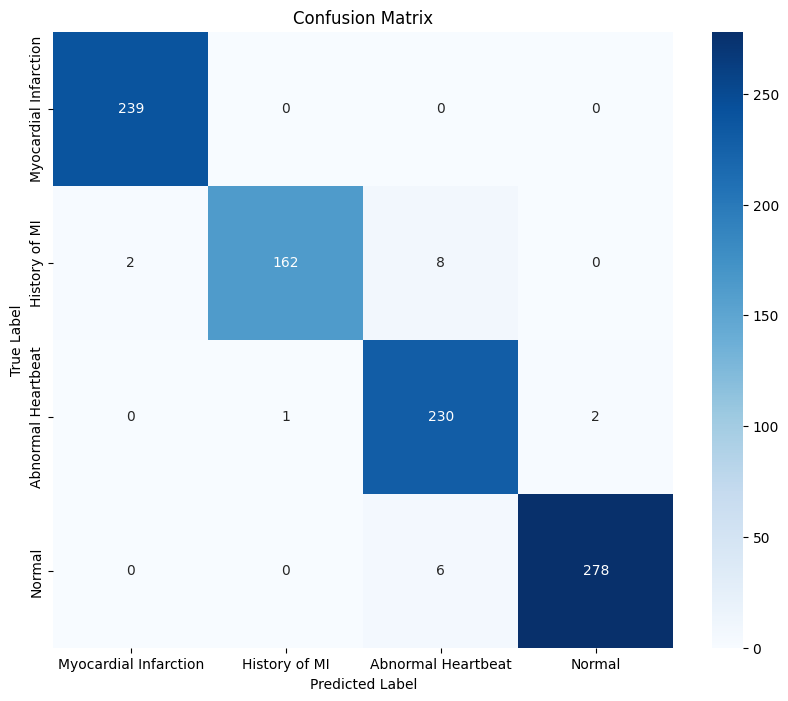


Overall Accuracy: 0.9795

Per-Class Accuracy:
Myocardial Infarction: 1.0000
History of MI: 0.9419
Abnormal Heartbeat: 0.9871
Normal: 0.9789


=== Validation Set Performance ===


Evaluating: 100%|██████████| 15/15 [00:15<00:00,  1.06s/it]



Classification Report:
                       precision    recall  f1-score   support

Myocardial Infarction     0.9795    1.0000    0.9896       143
        History of MI     1.0000    0.9221    0.9595        77
   Abnormal Heartbeat     0.9364    0.9904    0.9626       104
               Normal     0.9919    0.9685    0.9801       127

             accuracy                         0.9756       451
            macro avg     0.9769    0.9702    0.9729       451
         weighted avg     0.9765    0.9756    0.9756       451



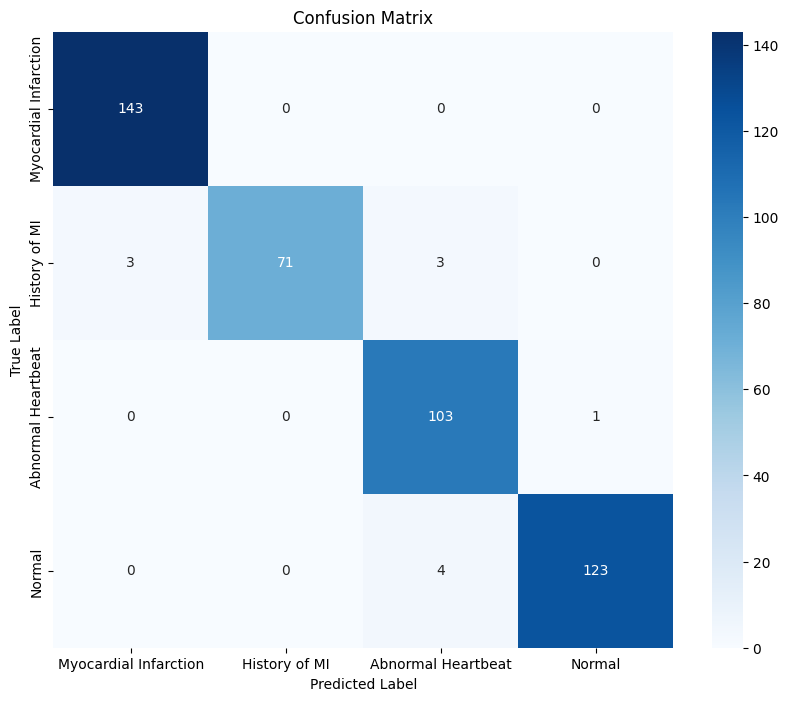


Overall Accuracy: 0.9756

Per-Class Accuracy:
Myocardial Infarction: 1.0000
History of MI: 0.9221
Abnormal Heartbeat: 0.9904
Normal: 0.9685


=== Training Set Performance ===


Evaluating: 100%|██████████| 81/81 [01:22<00:00,  1.01s/it]



Classification Report:
                       precision    recall  f1-score   support

Myocardial Infarction     0.9659    0.9754    0.9706       813
        History of MI     0.9455    0.8702    0.9063       439
   Abnormal Heartbeat     0.9511    0.9479    0.9495       595
               Normal     0.9350    0.9724    0.9533       725

             accuracy                         0.9502      2572
            macro avg     0.9494    0.9415    0.9449      2572
         weighted avg     0.9503    0.9502    0.9499      2572



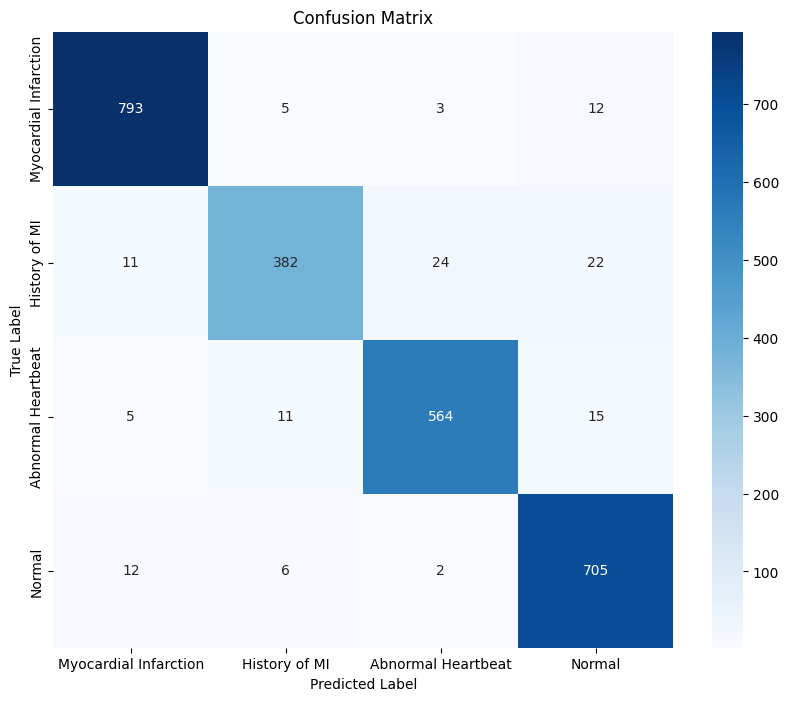


Overall Accuracy: 0.9502

Per-Class Accuracy:
Myocardial Infarction: 0.9754
History of MI: 0.8702
Abnormal Heartbeat: 0.9479
Normal: 0.9724


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

def evaluate_model(model, dataloader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc='Evaluating'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names, digits=4))
    
    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Calculate additional metrics
    accuracy = np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
    print(f"\nOverall Accuracy: {accuracy:.4f}")
    
    # Per-class accuracy
    class_correct = np.zeros(len(class_names))
    class_total = np.zeros(len(class_names))
    
    for i in range(len(all_labels)):
        class_correct[all_labels[i]] += (all_preds[i] == all_labels[i])
        class_total[all_labels[i]] += 1
    
    print("\nPer-Class Accuracy:")
    for i in range(len(class_names)):
        print(f"{class_names[i]}: {class_correct[i]/class_total[i]:.4f}")
    
    return all_preds, all_labels

# Class names from your dataset
class_names = ['Myocardial Infarction', 'History of MI', 'Abnormal Heartbeat', 'Normal']

# Load best model
model.load_state_dict(torch.load('best_model_eff_scratch.pth'))

# Evaluate on test set
print("\n\n=== Test Set Performance ===")
test_preds, test_labels = evaluate_model(model, test_loader, class_names)

# Evaluate on validation set
print("\n\n=== Validation Set Performance ===")
val_preds, val_labels = evaluate_model(model, val_loader, class_names)

# Evaluate on training set (for reference)
print("\n\n=== Training Set Performance ===")
train_preds, train_labels = evaluate_model(model, train_loader, class_names)

In [51]:
import timm
from tqdm import tqdm

Epoch 1/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.37s/it]


Train Loss: 1.4571 Acc: 0.2827


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]


Val Loss: 1.2953 Acc: 0.4435
Epoch 2/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 1.3123 Acc: 0.3826


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]


Val Loss: 1.2041 Acc: 0.4922
Epoch 3/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.37s/it]


Train Loss: 1.2479 Acc: 0.4168


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Val Loss: 1.1150 Acc: 0.5122
Epoch 4/50
----------


Training: 100%|██████████| 81/81 [01:49<00:00,  1.36s/it]


Train Loss: 1.2098 Acc: 0.4343


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]


Val Loss: 1.1961 Acc: 0.4213
Epoch 5/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.37s/it]


Train Loss: 1.1960 Acc: 0.4584


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]


Val Loss: 1.1825 Acc: 0.5233
Epoch 6/50
----------


Training: 100%|██████████| 81/81 [01:51<00:00,  1.37s/it]


Train Loss: 1.1255 Acc: 0.4914


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]


Val Loss: 0.9946 Acc: 0.6364
Epoch 7/50
----------


Training: 100%|██████████| 81/81 [01:53<00:00,  1.40s/it]


Train Loss: 1.1209 Acc: 0.5027


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.29s/it]


Val Loss: 0.8956 Acc: 0.6142
Epoch 8/50
----------


Training: 100%|██████████| 81/81 [01:52<00:00,  1.39s/it]


Train Loss: 1.0667 Acc: 0.5447


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.29s/it]


Val Loss: 0.9246 Acc: 0.6275
Epoch 9/50
----------


Training: 100%|██████████| 81/81 [01:52<00:00,  1.38s/it]


Train Loss: 1.0198 Acc: 0.5603


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.29s/it]


Val Loss: 0.8471 Acc: 0.6075
Epoch 10/50
----------


Training: 100%|██████████| 81/81 [01:52<00:00,  1.39s/it]


Train Loss: 0.9725 Acc: 0.5840


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.30s/it]


Val Loss: 0.8833 Acc: 0.6563
Epoch 11/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.8406 Acc: 0.6590


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]


Val Loss: 0.8001 Acc: 0.6408
Epoch 12/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.37s/it]


Train Loss: 0.7526 Acc: 0.7026


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.27s/it]


Val Loss: 0.6462 Acc: 0.7583
Epoch 13/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.6648 Acc: 0.7422


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Val Loss: 0.6877 Acc: 0.7184
Epoch 14/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.6484 Acc: 0.7539


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]


Val Loss: 0.4446 Acc: 0.8093
Epoch 15/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.5650 Acc: 0.7838


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Val Loss: 0.5267 Acc: 0.8049
Epoch 16/50
----------


Training: 100%|██████████| 81/81 [01:49<00:00,  1.36s/it]


Train Loss: 0.5247 Acc: 0.7998


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]


Val Loss: 0.5743 Acc: 0.7561
Epoch 17/50
----------


Training: 100%|██████████| 81/81 [01:49<00:00,  1.36s/it]


Train Loss: 0.5086 Acc: 0.8149


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Val Loss: 0.5707 Acc: 0.7761
Epoch 18/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.4878 Acc: 0.8138


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]


Val Loss: 0.3042 Acc: 0.8891
Epoch 19/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.4415 Acc: 0.8281


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.27s/it]


Val Loss: 0.2914 Acc: 0.9024
Epoch 20/50
----------


Training: 100%|██████████| 81/81 [01:53<00:00,  1.40s/it]


Train Loss: 0.4551 Acc: 0.8383


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.31s/it]


Val Loss: 0.2797 Acc: 0.9091
Epoch 21/50
----------


Training: 100%|██████████| 81/81 [01:52<00:00,  1.39s/it]


Train Loss: 0.4175 Acc: 0.8507


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.30s/it]


Val Loss: 0.2398 Acc: 0.9246
Epoch 22/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.37s/it]


Train Loss: 0.3941 Acc: 0.8550


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Val Loss: 0.3202 Acc: 0.8625
Epoch 23/50
----------


Training: 100%|██████████| 81/81 [01:53<00:00,  1.40s/it]


Train Loss: 0.3946 Acc: 0.8593


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.31s/it]


Val Loss: 0.3827 Acc: 0.8692
Epoch 24/50
----------


Training: 100%|██████████| 81/81 [01:54<00:00,  1.41s/it]


Train Loss: 0.3958 Acc: 0.8468


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.31s/it]


Val Loss: 0.1965 Acc: 0.9579
Epoch 25/50
----------


Training: 100%|██████████| 81/81 [01:56<00:00,  1.44s/it]


Train Loss: 0.3722 Acc: 0.8565


Validation: 100%|██████████| 15/15 [00:20<00:00,  1.35s/it]


Val Loss: 0.3205 Acc: 0.8891
Epoch 26/50
----------


Training: 100%|██████████| 81/81 [01:57<00:00,  1.45s/it]


Train Loss: 0.3589 Acc: 0.8674


Validation: 100%|██████████| 15/15 [00:20<00:00,  1.37s/it]


Val Loss: 0.2898 Acc: 0.9157
Epoch 27/50
----------


Training: 100%|██████████| 81/81 [01:57<00:00,  1.45s/it]


Train Loss: 0.3200 Acc: 0.8814


Validation: 100%|██████████| 15/15 [00:20<00:00,  1.38s/it]


Val Loss: 0.7628 Acc: 0.7472
Epoch 28/50
----------


Training: 100%|██████████| 81/81 [01:57<00:00,  1.45s/it]


Train Loss: 0.3447 Acc: 0.8771


Validation: 100%|██████████| 15/15 [00:20<00:00,  1.36s/it]


Val Loss: 0.2269 Acc: 0.9401
Epoch 29/50
----------


Training: 100%|██████████| 81/81 [01:57<00:00,  1.45s/it]


Train Loss: 0.2850 Acc: 0.8962


Validation: 100%|██████████| 15/15 [00:20<00:00,  1.37s/it]


Val Loss: 0.1629 Acc: 0.9623
Epoch 30/50
----------


Training: 100%|██████████| 81/81 [01:57<00:00,  1.46s/it]


Train Loss: 0.2861 Acc: 0.8939


Validation: 100%|██████████| 15/15 [00:20<00:00,  1.37s/it]


Val Loss: 0.1704 Acc: 0.9645
Epoch 31/50
----------


Training: 100%|██████████| 81/81 [01:58<00:00,  1.46s/it]


Train Loss: 0.2669 Acc: 0.9075


Validation: 100%|██████████| 15/15 [00:20<00:00,  1.39s/it]


Val Loss: 0.1490 Acc: 0.9601
Epoch 32/50
----------


Training: 100%|██████████| 81/81 [01:56<00:00,  1.44s/it]


Train Loss: 0.2405 Acc: 0.9133


Validation: 100%|██████████| 15/15 [00:20<00:00,  1.35s/it]


Val Loss: 0.1421 Acc: 0.9623
Epoch 33/50
----------


Training: 100%|██████████| 81/81 [01:55<00:00,  1.43s/it]


Train Loss: 0.2536 Acc: 0.9063


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.33s/it]


Val Loss: 0.1322 Acc: 0.9579
Epoch 34/50
----------


Training: 100%|██████████| 81/81 [01:55<00:00,  1.42s/it]


Train Loss: 0.2510 Acc: 0.9047


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.33s/it]


Val Loss: 0.1564 Acc: 0.9313
Epoch 35/50
----------


Training: 100%|██████████| 81/81 [01:56<00:00,  1.44s/it]


Train Loss: 0.2628 Acc: 0.9028


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.33s/it]


Val Loss: 0.1617 Acc: 0.9357
Epoch 36/50
----------


Training: 100%|██████████| 81/81 [01:51<00:00,  1.38s/it]


Train Loss: 0.2577 Acc: 0.9036


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]


Val Loss: 0.1678 Acc: 0.9446
Epoch 37/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.2484 Acc: 0.9090


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Val Loss: 0.1528 Acc: 0.9579
Epoch 38/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.37s/it]


Train Loss: 0.2489 Acc: 0.9055


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.27s/it]


Val Loss: 0.1599 Acc: 0.9401
Epoch 39/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.2356 Acc: 0.9133


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.29s/it]


Val Loss: 0.1486 Acc: 0.9512
Epoch 40/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.2454 Acc: 0.9102


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]


Val Loss: 0.1610 Acc: 0.9424
Epoch 41/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.2411 Acc: 0.9055


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]


Val Loss: 0.1424 Acc: 0.9534
Epoch 42/50
----------


Training: 100%|██████████| 81/81 [01:49<00:00,  1.35s/it]


Train Loss: 0.2492 Acc: 0.9071


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]


Val Loss: 0.1447 Acc: 0.9557
Epoch 43/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.37s/it]


Train Loss: 0.2576 Acc: 0.9164


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]


Val Loss: 0.1604 Acc: 0.9557
Epoch 44/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.2294 Acc: 0.9133


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Val Loss: 0.1477 Acc: 0.9512
Epoch 45/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.2237 Acc: 0.9195


Validation: 100%|██████████| 15/15 [00:18<00:00,  1.26s/it]


Val Loss: 0.1444 Acc: 0.9557
Epoch 46/50
----------


Training: 100%|██████████| 81/81 [01:51<00:00,  1.37s/it]


Train Loss: 0.2431 Acc: 0.9117


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]


Val Loss: 0.1517 Acc: 0.9623
Epoch 47/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.2426 Acc: 0.9079


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Val Loss: 0.1434 Acc: 0.9557
Epoch 48/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.2380 Acc: 0.9079


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.28s/it]


Val Loss: 0.1374 Acc: 0.9468
Epoch 49/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.36s/it]


Train Loss: 0.2461 Acc: 0.9082


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Val Loss: 0.1448 Acc: 0.9557
Epoch 50/50
----------


Training: 100%|██████████| 81/81 [01:50<00:00,  1.37s/it]


Train Loss: 0.2246 Acc: 0.9187


Validation: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


Val Loss: 0.1363 Acc: 0.9557
Best val Acc: 0.9645


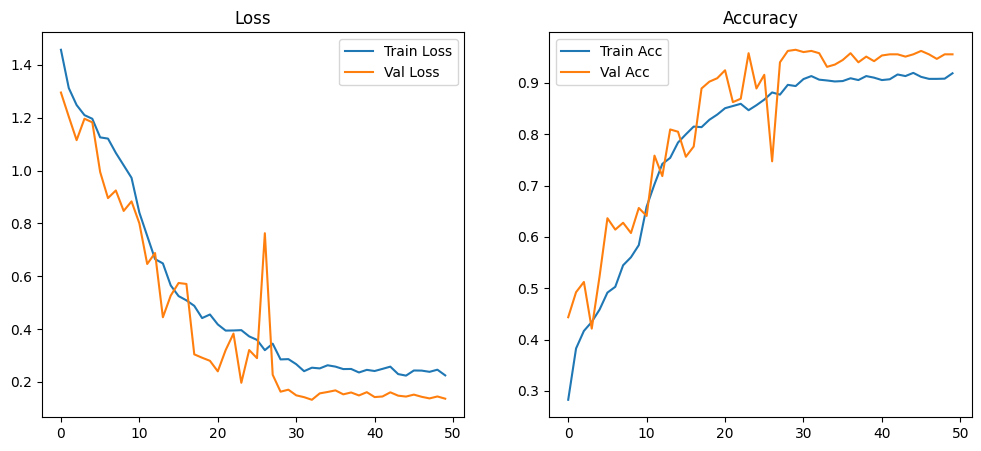

FileNotFoundError: [Errno 2] No such file or directory: 'best_model_msa_scratch.pth'

In [61]:
# Multi-Scale Attention Module
class MultiScaleAttention(nn.Module):
    def __init__(self, in_channels, reduction_ratio=4):
        super(MultiScaleAttention, self).__init__()
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(in_channels, in_channels//reduction_ratio, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels//reduction_ratio, in_channels, kernel_size=1),
            nn.Sigmoid()
        )
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(in_channels, in_channels//reduction_ratio, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels//reduction_ratio, 1, kernel_size=1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        ca = self.channel_attention(x)
        sa = self.spatial_attention(x)
        return x * ca + x * sa

# EfficientNet with Multi-Scale Attention (from scratch)
class EfficientNetMSA(nn.Module):
    def __init__(self, num_classes=4):
        super(EfficientNetMSA, self).__init__()
        # Create EfficientNet without pretrained weights
        self.base_model = timm.create_model('efficientnet_b0', pretrained=False, features_only=True)
        
        # Multi-Scale Attention modules
        self.msa1 = MultiScaleAttention(112)  # For 4th feature map
        self.msa2 = MultiScaleAttention(320)  # For 5th feature map
        
        # Classifier
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(320, 256),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
        
    def forward(self, x):
        features = self.base_model(x)
        features[3] = self.msa1(features[3])  # Apply to 4th feature map
        features[4] = self.msa2(features[4])  # Apply to 5th feature map
        x = self.avgpool(features[-1])
        x = torch.flatten(x, 1)
        return self.classifier(x)

# Initialize model
model = EfficientNetMSA(num_classes=4).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, verbose=True)

# Training function
def train_model(model, criterion, optimizer, scheduler, num_epochs=50):
    best_acc = 0.0
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        
        for inputs, labels in tqdm(train_loader, desc='Training'):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            
        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects.double() / len(train_dataset)
        history['train_loss'].append(epoch_loss)
        history['train_acc'].append(epoch_acc)
        print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc='Validation'):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                _, preds = torch.max(outputs, 1)
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)
                
        val_loss = val_loss / len(val_dataset)
        val_acc = val_corrects.double() / len(val_dataset)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')
        
        # Update learning rate
        scheduler.step(val_acc)
        
        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_model_scratch.pth')
            
    print(f'Best val Acc: {best_acc:.4f}')
    return model, history

# Train the model
model, history = train_model(model, criterion, optimizer, scheduler, num_epochs=50)

# Plot training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot([acc.cpu() for acc in history['train_acc']], label='Train Acc')
plt.plot([acc.cpu() for acc in history['val_acc']], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# Test function
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Load best model and test
model.load_state_dict(torch.load('best_model_msa_scratch.pth'))
test_model(model, test_loader)


In [62]:
# Test function
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Load best model and test
model.load_state_dict(torch.load('best_model_scratch.pth'))
test_model(model, test_loader)


Testing: 100%|██████████| 29/29 [00:39<00:00,  1.36s/it]

Test Accuracy: 95.91%




=== Test Set Performance ===


Evaluating: 100%|██████████| 29/29 [00:39<00:00,  1.36s/it]



Classification Report:
                       precision    recall  f1-score   support

Myocardial Infarction     0.9917    1.0000    0.9958       239
        History of MI     0.9167    0.8953    0.9059       172
   Abnormal Heartbeat     0.9259    0.9657    0.9454       233
               Normal     0.9855    0.9577    0.9714       284

             accuracy                         0.9591       928
            macro avg     0.9550    0.9547    0.9546       928
         weighted avg     0.9594    0.9591    0.9590       928



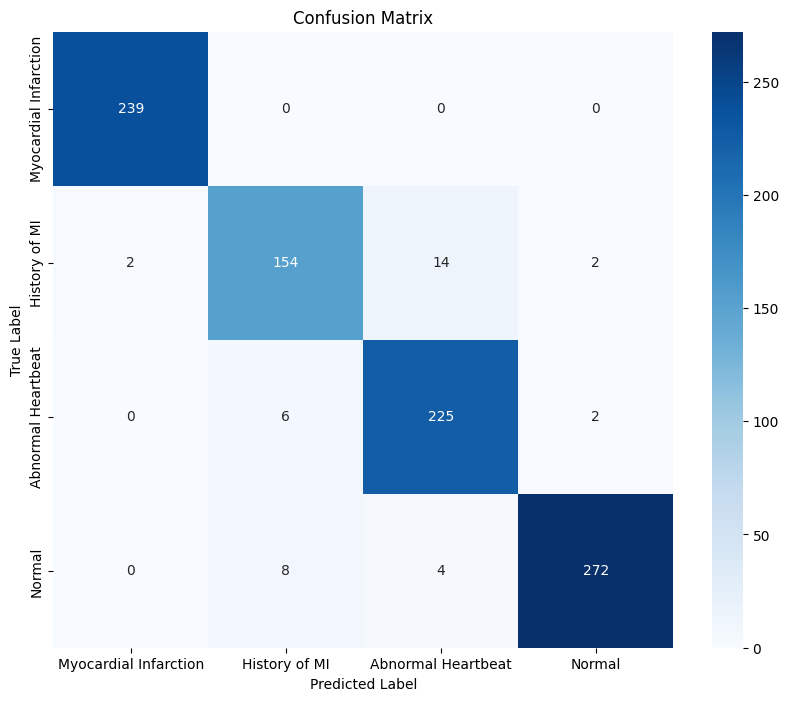


Overall Accuracy: 0.9591

Per-Class Accuracy:
Myocardial Infarction: 1.0000
History of MI: 0.8953
Abnormal Heartbeat: 0.9657
Normal: 0.9577


=== Validation Set Performance ===


Evaluating: 100%|██████████| 15/15 [00:19<00:00,  1.30s/it]



Classification Report:
                       precision    recall  f1-score   support

Myocardial Infarction     1.0000    1.0000    1.0000       143
        History of MI     0.9103    0.9221    0.9161        77
   Abnormal Heartbeat     0.9439    0.9712    0.9573       104
               Normal     0.9756    0.9449    0.9600       127

             accuracy                         0.9645       451
            macro avg     0.9574    0.9595    0.9584       451
         weighted avg     0.9649    0.9645    0.9646       451



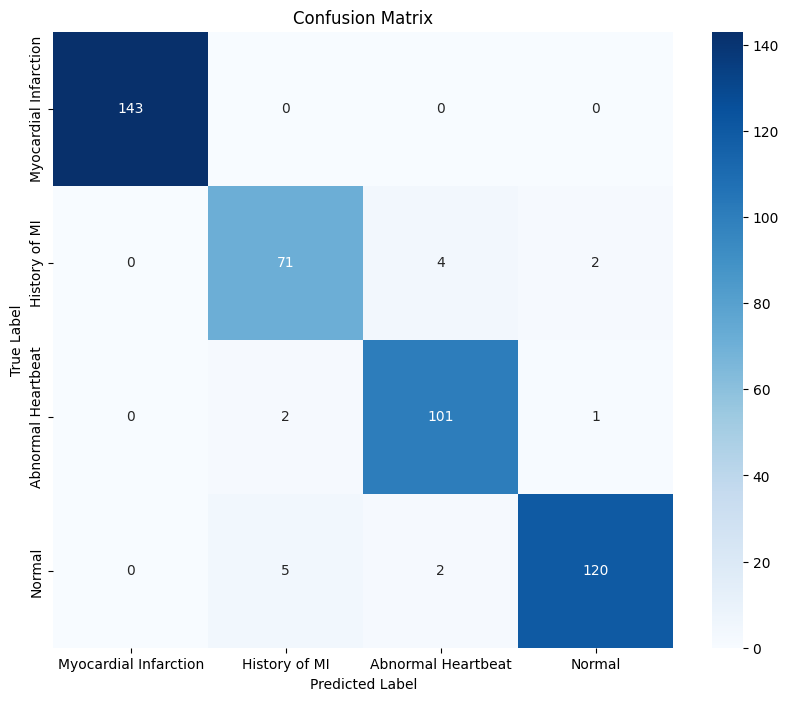


Overall Accuracy: 0.9645

Per-Class Accuracy:
Myocardial Infarction: 1.0000
History of MI: 0.9221
Abnormal Heartbeat: 0.9712
Normal: 0.9449


=== Training Set Performance ===


Evaluating: 100%|██████████| 81/81 [01:43<00:00,  1.27s/it]



Classification Report:
                       precision    recall  f1-score   support

Myocardial Infarction     0.9552    0.9434    0.9493       813
        History of MI     0.8938    0.8246    0.8578       439
   Abnormal Heartbeat     0.8873    0.9261    0.9062       595
               Normal     0.9206    0.9434    0.9319       725

             accuracy                         0.9191      2572
            macro avg     0.9142    0.9094    0.9113      2572
         weighted avg     0.9192    0.9191    0.9188      2572



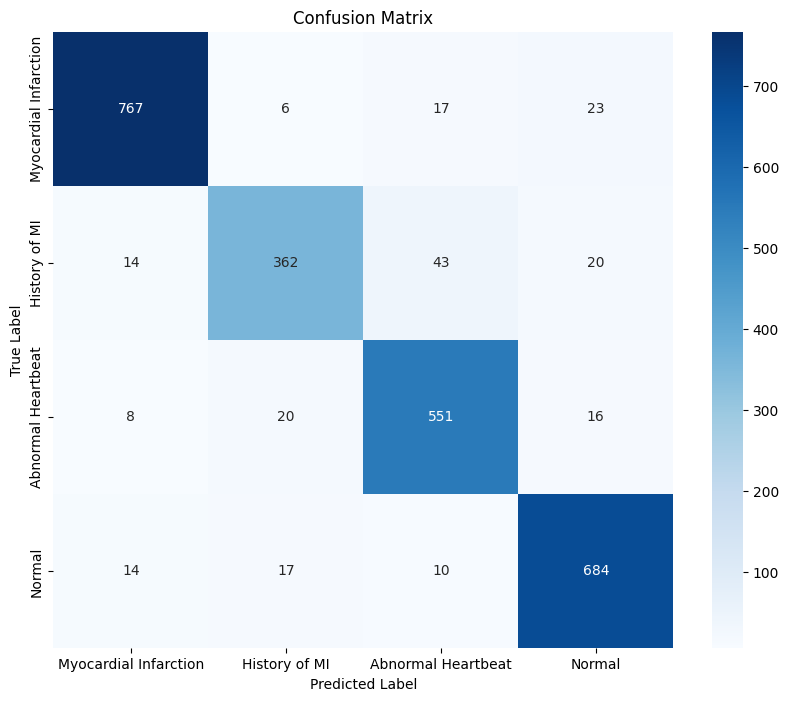


Overall Accuracy: 0.9191

Per-Class Accuracy:
Myocardial Infarction: 0.9434
History of MI: 0.8246
Abnormal Heartbeat: 0.9261
Normal: 0.9434


In [64]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

def evaluate_model(model, dataloader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc='Evaluating'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names, digits=4))
    
    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Calculate additional metrics
    accuracy = np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
    print(f"\nOverall Accuracy: {accuracy:.4f}")
    
    # Per-class accuracy
    class_correct = np.zeros(len(class_names))
    class_total = np.zeros(len(class_names))
    
    for i in range(len(all_labels)):
        class_correct[all_labels[i]] += (all_preds[i] == all_labels[i])
        class_total[all_labels[i]] += 1
    
    print("\nPer-Class Accuracy:")
    for i in range(len(class_names)):
        print(f"{class_names[i]}: {class_correct[i]/class_total[i]:.4f}")
    
    return all_preds, all_labels

# Class names from your dataset
class_names = ['Myocardial Infarction', 'History of MI', 'Abnormal Heartbeat', 'Normal']

# Load best model
model.load_state_dict(torch.load('best_model_scratch.pth'))

# Evaluate on test set
print("\n\n=== Test Set Performance ===")
test_preds, test_labels = evaluate_model(model, test_loader, class_names)

# Evaluate on validation set
print("\n\n=== Validation Set Performance ===")
val_preds, val_labels = evaluate_model(model, val_loader, class_names)

# Evaluate on training set (for reference)
print("\n\n=== Training Set Performance ===")
train_preds, train_labels = evaluate_model(model, train_loader, class_names)